# Denoising Autoencoders And Where To Find Them

Today we're going to train deep autoencoders and deploy them to faces and search for similar images.

Our new test subjects are human faces from the [lfw dataset](http://vis-www.cs.umass.edu/lfw/).

# Import stuff

In [49]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
%matplotlib inline
from time import time

# Load dataset
Dataset was downloaded for you. Relevant links (just in case):
- http://www.cs.columbia.edu/CAVE/databases/pubfig/download/lfw_attributes.txt
- http://vis-www.cs.umass.edu/lfw/lfw-deepfunneled.tgz
- http://vis-www.cs.umass.edu/lfw/lfw.tgz

In [50]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


In [51]:
img_shape = (h, w, 3)

# Split into a training set and a test set using a stratified k fold

In [52]:
# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

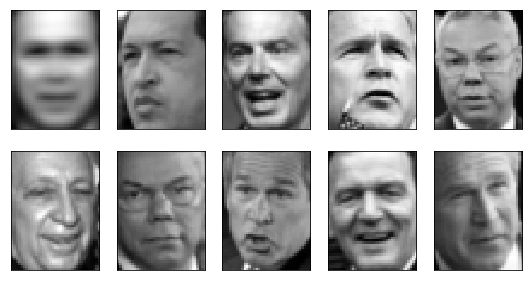

In [53]:
def plot_faces(images, n_row=2, n_col=5):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.5 * n_col, 2.2 * n_row))
    plt.subplots_adjust(0.6, 0.5, 1.5, 1.5)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.xticks(())
        plt.yticks(())
    plt.tight_layout()
    plt.show()
    

Xmean = np.mean(X,axis=0).reshape(1,n_features) # average face
#plot the average face and some samples from the dataset
plot_faces(np.concatenate((Xmean,X[:9]),axis=0))

Extracting the top 60 eigenfaces from 966 faces
done in 0.069s


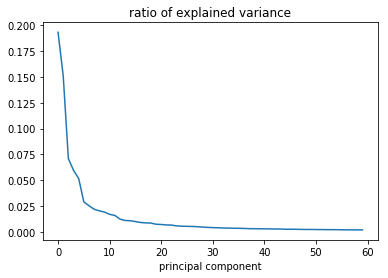

In [54]:
n_components = 60

print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))
t0 = time()
pca = PCA(n_components=n_components, svd_solver='randomized').fit(X_train)
print("done in %0.3fs" % (time() - t0))

f,ax = plt.subplots()
plt.plot(pca.explained_variance_ratio_)
plt.title("ratio of explained variance")
ax.set_xlabel("principal component")
plt.show()

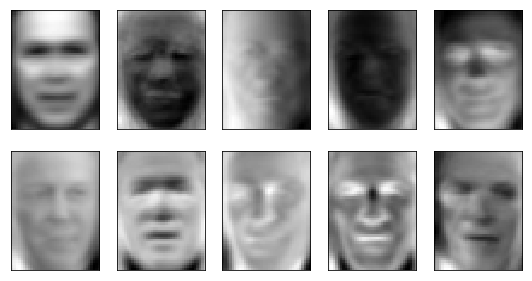

In [56]:
eigenfaces = pca.components_
#plot the average face and top eigenfaces
plot_faces(np.concatenate((Xmean,eigenfaces[:10]),axis=0))

In [55]:
Xmean = pca.mean_.reshape(1,n_features)
print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in %0.3fs" % (time() - t0))

Projecting the input data on the eigenfaces orthonormal basis
done in 0.011s


Projections to the principal components (obtained via pca.transform) can be viewed as a compression of the original images. To see the images which can be recovered from this compression, use pca.inverse_transform.

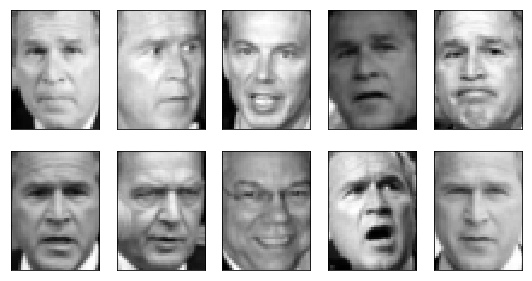

In [58]:
#original faces
plot_faces(X_test[:10])

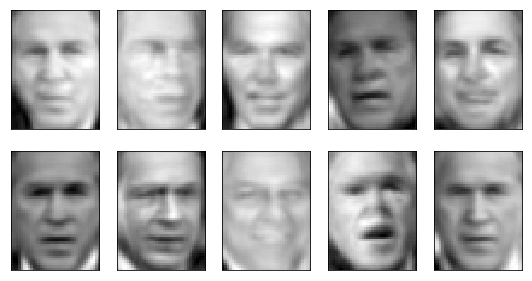

In [59]:
#reconstructed faces
X_test_rec = pca.inverse_transform(X_test_pca)
plot_faces(X_test_rec[:10])